# PID Robot non Interactive

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, Polygon, Arrow
from matplotlib.collections import PatchCollection
import time

In [2]:
# Define a RobotCar class
class RobotCar:
    def __init__(self, control_fct, initial_pose=[0., 4., 0.], command=[0.1, 0.]):
        self.pose = np.array(initial_pose)  # Robot's pose [x, y, theta]
        self.command = np.array(command)  # Robot's command [velocity, turning angle]
        self.hist_pos = np.array([[0.], [4.]])  # History of robot's positions for plotting

        self.control_function = control_fct

        # Create a figure and axis
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

        self.fig = fig
        self.ax = ax
        # Set the axis limits and aspect ratio
        self.ax.set_xlim(-1, 23)
        self.ax.set_ylim(-6, 6)
        self.ax.set_aspect('equal')

        self.error = 0.

        self.ax.plot([-2.,25], [0.,0.], color="green")

        self.init_visualization_patches()

    def init_visualization_patches(self):
        # Create the robot body and wheels
        v_initial = [[-1, -0.5], [-1, 0.5], [1, 0.5], [1, -0.5]]
        body = Polygon(v_initial, closed=True, fc='r', ec='gray')
        left_front_wheel = Rectangle((0.3, 0.5), 0.4, 0.1, fc='gray', ec='black', lw=3)
        left_hind_wheel = Rectangle((-0.7, 0.5), 0.4, 0.1, fc='gray', ec='black', lw=3)
        right_front_wheel = Rectangle((0.3, -0.5), 0.4, 0.1, fc='gray', ec='black', lw=3)
        right_hind_wheel = Rectangle((-0.7, -0.5), 0.4, 0.1, fc='gray', ec='black', lw=3)

        self.robot = PatchCollection([body, left_front_wheel,left_hind_wheel, right_front_wheel,right_hind_wheel], match_original=True)
        self.arrow_left = Arrow(1,0,1,0, width=0.5, color="blue")
        # Add the patches to the axis
        self.ax.add_collection( self.robot )
        self.arr_hook = self.ax.add_patch( self.arrow_left )

        self.line_robot_hist, = self.ax.plot(self.hist_pos[0], self.hist_pos[1], zorder=0)

    def update_visualization(self):
        # Update the visualization of the robot's pose and history
        r = mpl.transforms.Affine2D().rotate(self.pose[2])
        t = mpl.transforms.Affine2D().translate(self.pose[0], self.pose[1])
        tra = r + t + self.ax.transData
        self.robot.set_transform(tra)
        self.line_robot_hist.set_data(self.hist_pos)
        self.arr_hook.remove()
        self.arrow_left = Arrow(1, 0, 1, self.command[1] * 15, width=0.5, color="blue")
        self.arr_hook = self.ax.add_patch( self.arrow_left )
        self.arrow_left.set_transform(tra)

    def reset_position(self, button):
        # Reset the position of the robot
        self.pose = np.array([0., 4., 0.])
        self.hist_pos = np.array([[0.], [4.]])
        self.update_visualization()

    def simulate_one_step(self, button=None):
        self.error = -self.pose[1]
        self.command[1] = self.control_function( self.error )
        if self.command[1] < -0.03:
            self.command[1] = -0.03
        elif self.command[1] > 0.03:
            self.command[1] = 0.03 
        # Simulate one step of the robot's motion
        self.pose[0] += np.cos(self.pose[2]) * self.command[0]
        self.pose[1] += np.sin(self.pose[2]) * self.command[0]
        self.pose[2] += self.command[1]
        self.hist_pos = np.append(self.hist_pos, np.array([[self.pose[0]], [self.pose[1]]]), axis=1)
        self.update_visualization()
       #self.fig.canvas.draw()

    def simulation_run(self, steps=400, button=None):
        # Run the simulation for a certain number of steps
        for i in range(0, steps):
            self.simulate_one_step(button)
            #time.sleep(0.02)

In [3]:
def control_function( error ):
    steering = np.sign(error)
    return steering

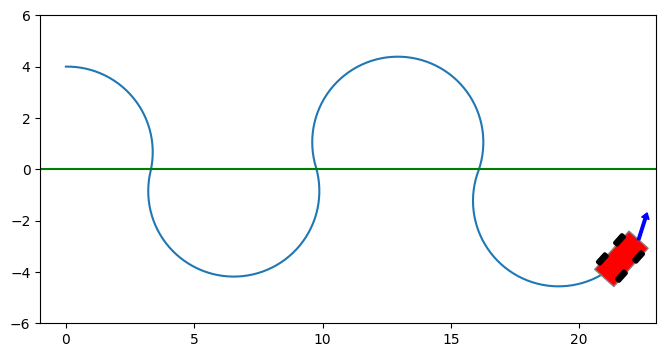

In [4]:
# Create a RobotCar instance
robot_car = RobotCar( control_function )

# Start the simulation
robot_car.update_visualization()
robot_car.simulation_run( 400 )
plt.show()